In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE
from sklearn.preprocessing import power_transform,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [117]:
df=pd.read_csv('titanic_.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<span class="burk">Analysing data</span>

In [118]:
df.shape

(891, 12)

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [121]:
df.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.050,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.000,F2,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.500,NaN,Q
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.050,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.850,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.400,NaN,C


In [122]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<span class="burk">Visualization</span>

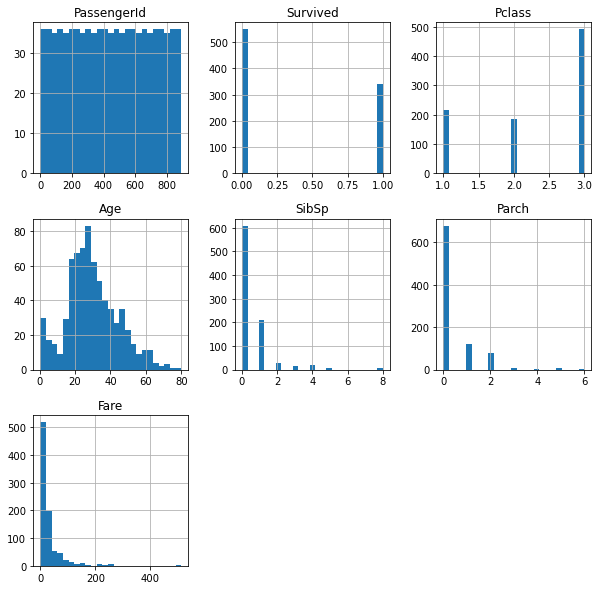

In [126]:
df.hist(bins=25,figsize=(10,10))
plt.show()

In [127]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

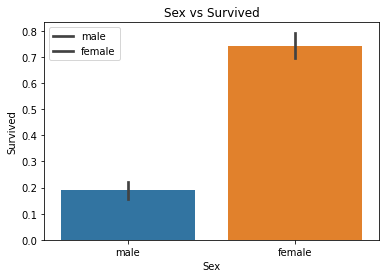

In [128]:
num = df[['Age','SibSp','Parch','Fare']]
cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
sns.color_palette('muted')
sns.barplot(data=df ,x='Sex',y='Survived').set_title("Sex vs Survived")
plt.legend(['male','female'])
plt.show()

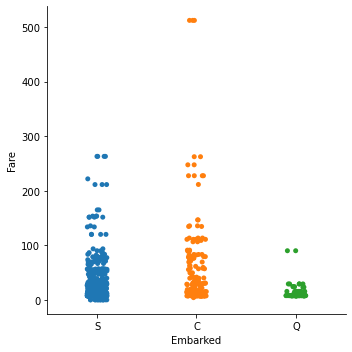

In [129]:
sns.catplot(x='Embarked', y='Fare', data=df)

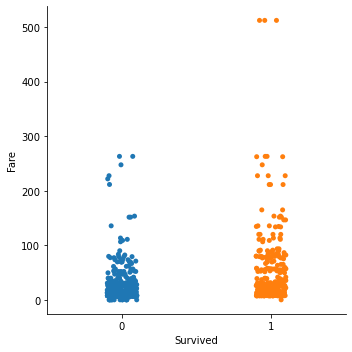

In [130]:
sns.catplot(x='Survived', y='Fare', data=df)

<Figure size 1440x1440 with 0 Axes>

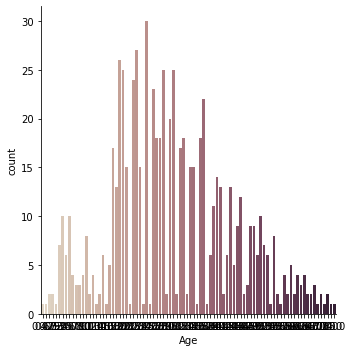

In [131]:
plt.figure(figsize=(20,20))
sns.catplot(x="Age", kind="count", palette="ch:.25", data=df)


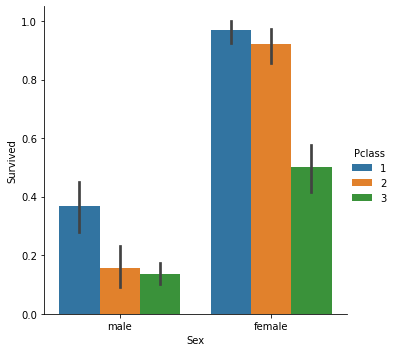

In [132]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)

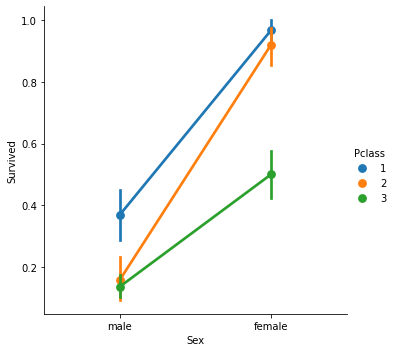

In [133]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=df)

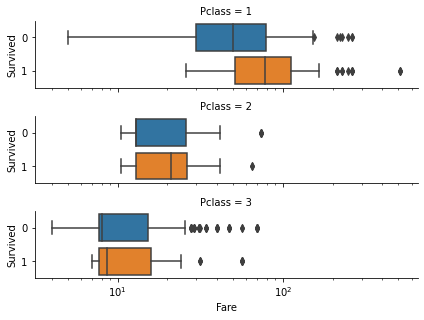

In [134]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df.query("Fare > 0"))
g.set(xscale="log")

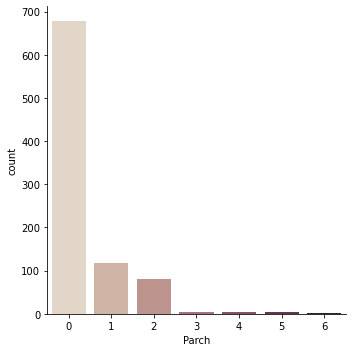

In [135]:
sns.catplot(x="Parch", kind="count", palette="ch:.25", data=df)

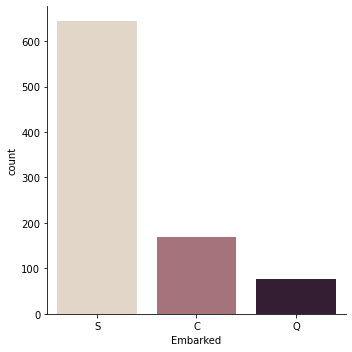

In [136]:
sns.catplot(x="Embarked", kind="count", palette="ch:.25", data=df)

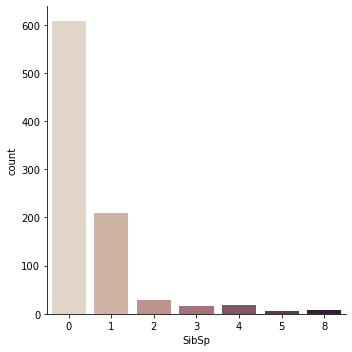

In [137]:
sns.catplot(x="SibSp", kind="count", palette="ch:.25", data=df)

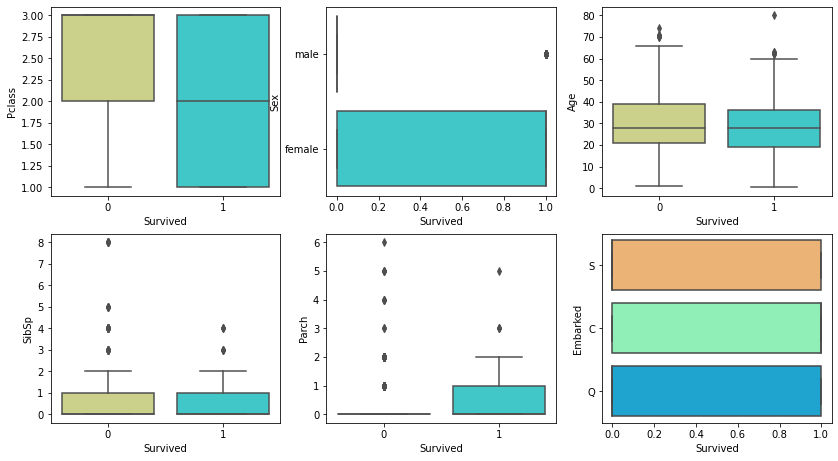

In [138]:
plt.figure(figsize=(14,16))
cols=['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked']
cnt=1
for col in cols:
    plt.subplot(4,3,cnt)
    sns.boxplot(x='Survived',y=col,data=df,palette='rainbow_r')
    cnt=cnt+1
plt.show()    

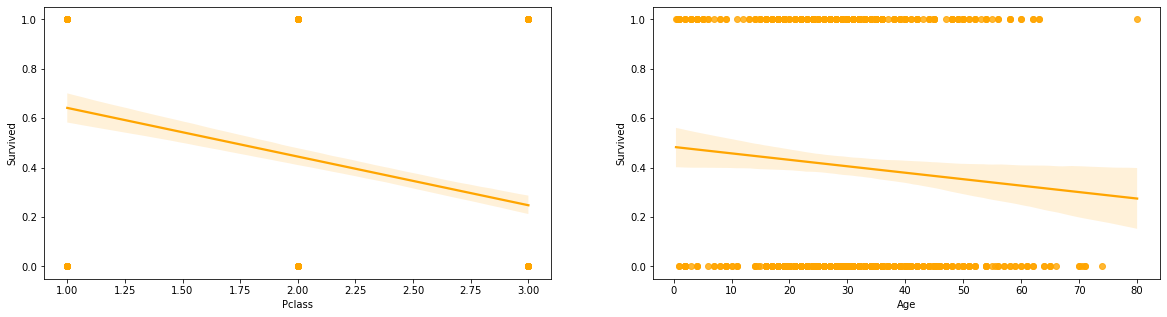

In [139]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
cols=['Pclass','Age']
for col, ax in zip(cols,axs.flat):
    sns.regplot(x=df[col],y=df['Survived'],color='orange',ax=ax)

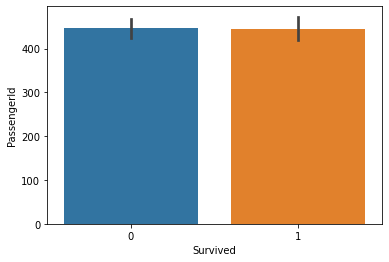

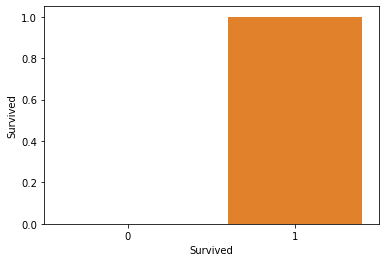

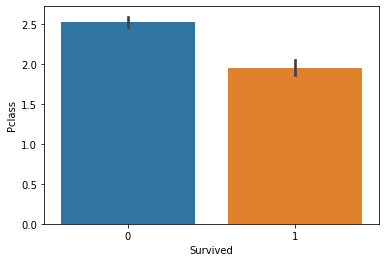

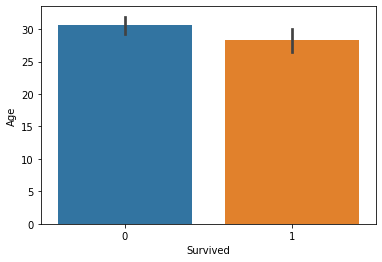

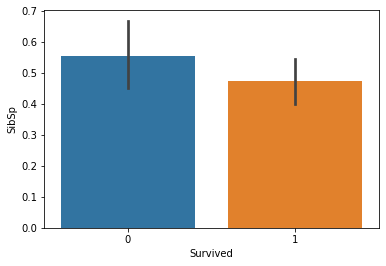

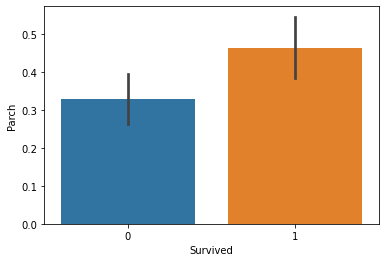

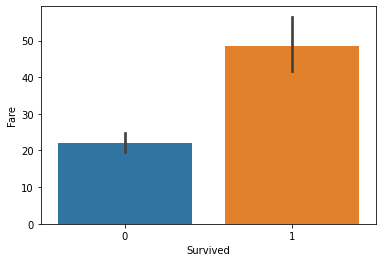

In [140]:
df1=df.select_dtypes([np.int,np.float])
for i,col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='Survived',y=col,data=df1)

In [141]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [143]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [144]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<span class="burk">Data cleaning</span>

<AxesSubplot:xlabel='Age', ylabel='count'>

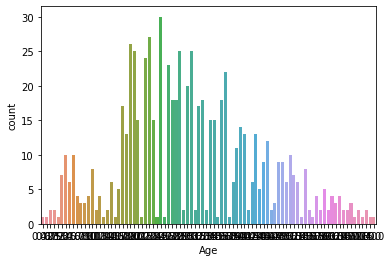

In [145]:
sns.countplot(x='Age',data=df)

In [146]:
df1=df['Age'].fillna(df['Age'].mean(),inplace=True)
df1

In [147]:
# We can simply fill the embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [148]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [149]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [150]:
#These columns do not contribute to the model in any way
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [151]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [152]:
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [153]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


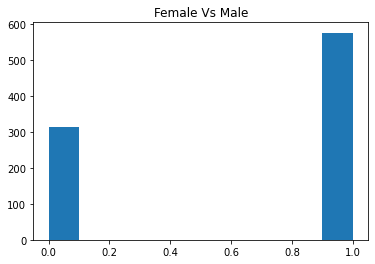

In [154]:
df['Sex'].hist(grid=False)
plt.title('Female Vs Male')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

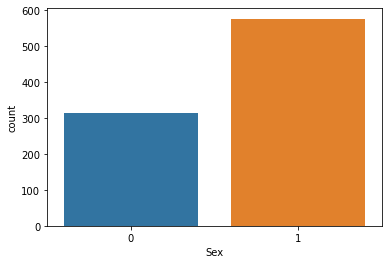

In [155]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

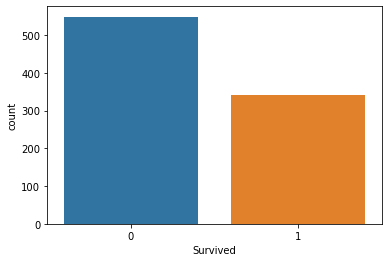

In [156]:
sns.countplot(df['Survived'])

<AxesSubplot:>

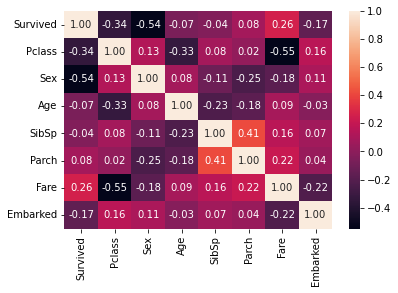

In [157]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

In [158]:
x=df.drop(["Survived"],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [159]:
x.shape

(891, 7)

In [160]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [161]:
y.shape

(891,)

In [162]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [163]:
from collections import Counter
# transform the dataset
sm = SMOTE()
x,y= sm.fit_resample(x, y)

In [164]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 549, 1: 549})


In [165]:
x.shape

(1098, 7)

In [166]:
y.shape

(1098,)

In [167]:
x=np.sqrt(x)
x.skew()

Pclass     -0.530692
Sex        -0.253722
Age        -0.903140
SibSp       1.462803
Parch       1.556126
Fare        1.866867
Embarked   -1.338392
dtype: float64

In [168]:
PowerTransformer()
x_new=power_transform(x)

In [169]:
x_new

array([[ 0.94377612,  0.8813053 , -0.53450562, ..., -0.55276273,
        -0.88960061,  0.64494893],
       [-1.37599648, -1.13468057,  0.65448353, ..., -0.55276273,
         1.199273  , -1.80669619],
       [ 0.94377612, -1.13468057, -0.2296169 , ..., -0.55276273,
        -0.81660742,  0.64494893],
       ...,
       [ 0.94377612, -1.13468057,  0.04721079, ..., -0.55276273,
        -0.82607142, -0.74727582],
       [-1.37599648, -1.13468057,  0.94107244, ..., -0.55276273,
         2.3143798 , -0.74727582],
       [ 0.94377612, -1.13468057, -1.86963979, ...,  1.78967245,
        -0.42949768, -0.74727582]])

In [170]:
type(x_new)

numpy.ndarray

In [171]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [172]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.943776,0.881305,-0.534506,1.469449,-0.552763,-0.889601,0.644949
1,-1.375996,-1.134681,0.654484,1.469449,-0.552763,1.199273,-1.806696
2,0.943776,-1.134681,-0.229617,-0.663597,-0.552763,-0.816607,0.644949
3,-1.375996,-1.134681,0.436962,1.469449,-0.552763,0.910026,0.644949
4,0.943776,0.881305,0.436962,-0.663597,-0.552763,-0.803689,0.644949
...,...,...,...,...,...,...,...
1093,-0.349570,-1.134681,-1.030004,-0.663597,-0.552763,-0.357238,-1.806696
1094,0.943776,0.881305,0.217302,-0.663597,-0.552763,0.970542,0.644949
1095,0.943776,-1.134681,0.047211,-0.663597,-0.552763,-0.826071,-0.747276
1096,-1.375996,-1.134681,0.941072,-0.663597,-0.552763,2.314380,-0.747276


In [173]:
x.skew().sort_values(ascending=False)

Parch       1.258377
SibSp       0.847502
Age         0.041944
Fare       -0.003317
Sex        -0.253722
Pclass     -0.328276
Embarked   -1.039698
dtype: float64

In [174]:
round(np.abs(x.skew()),2)<=.22

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

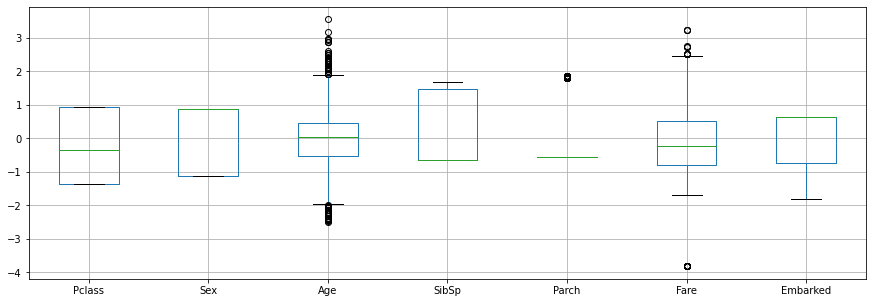

In [175]:
x.iloc[:,:].boxplot(figsize=[15,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [176]:
from scipy.stats import zscore
dfscore=np.abs(zscore(x))

print(np.where(dfscore>3))


(array([179, 258, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674,
       679, 732, 737, 806, 815, 822, 851], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2],
      dtype=int64))


In [177]:
dfnew=df[(dfscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (871, 8)


In [178]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [179]:
x=df.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [180]:
x.skew()

Pclass     -0.657223
Sex        -0.587254
Age         0.374387
SibSp       3.652241
Parch       2.714505
Fare        3.171499
Embarked   -1.252158
dtype: float64

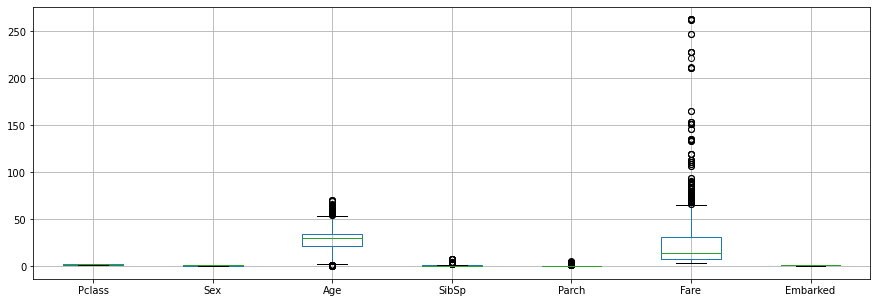

In [181]:
x.iloc[:,:].boxplot(figsize=[15,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [182]:
x.shape


(871, 7)

In [183]:
y=df['Survived']
y.shape

(871,)

In [184]:
df['Survived'].value_counts()

0    534
1    337
Name: Survived, dtype: int64

In [185]:
from collections import Counter
# transform the dataset
sm = SMOTE()
x,y= sm.fit_resample(x, y)

In [186]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 534, 1: 534})



<span class="burk">Random state</span>

In [187]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()

In [188]:
maxAccu=0
maxRS=0
model=[lg,dtc]

for i in range(1,200):
    for m in model:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred=m.predict(x_test)
        acc=(accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print(m,'accuracy',acc,'random_state',i)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
            print('max_accuracy',maxAccu,'max_random_state',i)
            

LogisticRegression() accuracy 0.8364485981308412 random_state 1
max_accuracy 0.8364485981308412 max_random_state 1
DecisionTreeClassifier() accuracy 0.7850467289719626 random_state 1
LogisticRegression() accuracy 0.8177570093457944 random_state 2
DecisionTreeClassifier() accuracy 0.8411214953271028 random_state 2
max_accuracy 0.8411214953271028 max_random_state 2
LogisticRegression() accuracy 0.8364485981308412 random_state 3
DecisionTreeClassifier() accuracy 0.8411214953271028 random_state 3
LogisticRegression() accuracy 0.8411214953271028 random_state 4
DecisionTreeClassifier() accuracy 0.8130841121495327 random_state 4
LogisticRegression() accuracy 0.8084112149532711 random_state 5
DecisionTreeClassifier() accuracy 0.780373831775701 random_state 5
LogisticRegression() accuracy 0.8130841121495327 random_state 6
DecisionTreeClassifier() accuracy 0.7990654205607477 random_state 6
LogisticRegression() accuracy 0.8457943925233645 random_state 7
max_accuracy 0.8457943925233645 max_random_

In [189]:
print('Best Accuracy is ', maxAccu, 'on random_state',maxRS)

Best Accuracy is  0.8785046728971962 on random_state 188


<span class="burk">Train Test split</span>

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=45)

In [191]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [192]:
def models(x_train,y_train):
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    
    from sklearn.linear_model import LogisticRegression
    lg=LogisticRegression(random_state=0)
    lg.fit(x_train,y_train)
    
    
    from sklearn.svm import SVC
    svc=SVC(kernel='rbf',random_state=0)
    svc.fit(x_train,y_train)
    
    
    from sklearn.svm import SVC
    svc=SVC(kernel='linear',random_state=0)
    svc.fit(x_train,y_train)
    
    
    from sklearn.naive_bayes import GaussianNB
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    
    
    from sklearn.tree import DecisionTreeClassifier
    dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
    dtc.fit(x_train,y_train)
    
    
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rfc.fit(x_train,y_train)
    
    #print model accuracy on training data

    print("[0]KNeighbors Classifier Training Accuracy :" ,knn.score(x_train,y_train))
    print("[1]]Logistic Regression Training Accuracy :" ,lg.score(x_train,y_train))
    print("[2]SVC (rbf)Training Accuracy :" ,svc.score(x_train,y_train))
    print("[3]SVC (linear)Training Accuracy :" ,svc.score(x_train,y_train))
    print("[4]GaussianNB Training Accuracy :" ,gnb.score(x_train,y_train))
    print("[5]Decision Tree ClassifierTraining Accuracy :" ,dtc.score(x_train,y_train))
    print("[6]Random Forest Classifier Training Accuracy :" ,rfc.score(x_train,y_train))
    
    return knn,lg,svc,svc,gnb,dtc,rfc

In [193]:
model=models(x_train,y_train)

[0]KNeighbors Classifier Training Accuracy : 0.8676814988290398
[1]]Logistic Regression Training Accuracy : 0.8091334894613583
[2]SVC (rbf)Training Accuracy : 0.7868852459016393
[3]SVC (linear)Training Accuracy : 0.7868852459016393
[4]GaussianNB Training Accuracy : 0.7939110070257611
[5]Decision Tree ClassifierTraining Accuracy : 0.9836065573770492
[6]Random Forest Classifier Training Accuracy : 0.9754098360655737


<span class="burk">accuracy score,confusion_matrix</span>

In [194]:
<div class="burk">
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()</div><i class="fa fa-lightbulb-o "></i>

In [195]:
model=[lg,dtc,gnb,svc,knn,rfc]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

0.8504672897196262
[[90 12]
 [20 92]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       102
           1       0.88      0.82      0.85       112

    accuracy                           0.85       214
   macro avg       0.85      0.85      0.85       214
weighted avg       0.85      0.85      0.85       214

0.8644859813084113
[[90 12]
 [17 95]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.89      0.85      0.87       112

    accuracy                           0.86       214
   macro avg       0.86      0.87      0.86       214
weighted avg       0.87      0.86      0.86       214

0.8177570093457944
[[84 18]
 [21 91]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       102
           1       0.83      0.81      0.82       112

    accuracy                           0.82       214
   macro avg  

<span class="burk">Roc curve</span>

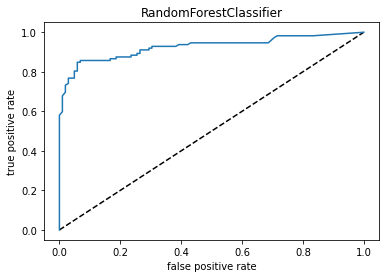

0.9259453781512605

In [196]:
<div class="burk">
pred_p=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_p)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_s=roc_auc_score(y_test,pred_p)
auc_s</div><i class="fa fa-lightbulb-o "></i>

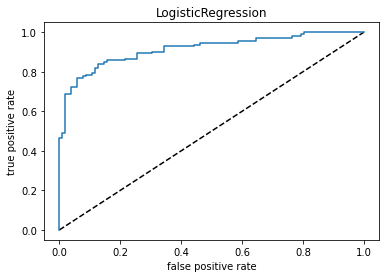

0.9146533613445379

In [197]:
pred_p=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_p)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()
auc_s=roc_auc_score(y_test,pred_p)
auc_s

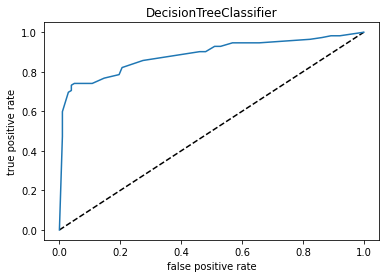

0.885329131652661

In [198]:
<div class="mark">
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=1,min_samples_leaf=7)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
accuracy_score(y_test,pred)
pred_p=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_p)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_s=roc_auc_score(y_test,pred_p)
auc_s</div><i class="fa fa-lightbulb-o "></i>

<span class="burk">cross validation score</span>

In [199]:
score=cross_val_score(lg,x,y,cv=9)
print('cross validation score of Logistic Regression model :',score.mean())

cross validation score of Logistic Regression model : 0.8082182025352513


In [200]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72897196 0.81775701 0.74299065 0.82159624 0.82629108]
0.7875213900223773
0.04240141291685086


In [201]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.6635514  0.71962617 0.80373832 0.80751174 0.76995305]
0.7528761353165724
0.05467741759076917


In [202]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.55140187 0.6682243  0.72897196 0.72300469 0.66197183]
0.6667149313325436
0.06382217940385548


In [203]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71962617 0.78971963 0.73831776 0.85446009 0.87793427]
0.7960115835198105
0.06217789529556819


In [204]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77570093 0.8364486  0.81308411 0.88262911 0.87323944]
0.8362204378921504
0.039299167506216016


<span class="burk">GridSearchCV</span>

In [92]:
parameters={"max_features":['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [93]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=7,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [94]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [95]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8785046728971962

In [205]:
filename = 'finalized_modelgcv.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = accuracy_score(y_test,gcv_pred)
print(result)

0.8785046728971962
